NAME: Raviteja Ruttala


ID Number : 21031957

In [160]:
!pip install wbgapi
!pip install darts

You should consider upgrading via the '/storage/anaconda/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/storage/anaconda/bin/python -m pip install --upgrade pip' command.


In [1]:
import wbgapi as wb

In [ ]:
fresh_water = wb.data.DataFrame("SP.POP.GROW")

In [ ]:

fresh_trans = fresh_water.T
fresh_trans

In [ ]:


fresh_series = fresh_trans['WLD']
fresh_series

In [ ]:


fresh_urban = wb.data.DataFrame("EN.ATM.METH.KT.CE")
fresh_trans = fresh_urban.T
fresh_trans
meth_series = fresh_trans['WLD']
meth_series

In [ ]:


meth_series.corr(fresh_series, method='pearson')

In [ ]:

import matplotlib as plt
global_change= fresh_trans[["WLD"]]
change = fresh_trans['WLD']
global_change.plot(kind= "bar",  figsize=(15, 5), title= "Fresh Water")

In [ ]:


change.plot(kind= "bar",  figsize=(15, 5), title= "urban population")

In [ ]:

from darts import TimeSeries
import pandas as pd

In [ ]:

pop_frame = fresh_series.to_frame().reset_index()
pop_frame
pop_frame.reset_index(drop=True, inplace=True)
#pop_frame.drop(['index'])
pop_frame.insert(0, 'Index', range(1960, 1960 + len(pop_frame)))
pop_frame.set_index('Index', inplace=True)
x = pop_frame.reset_index()
x.reset_index()
pop_re = x.drop(['index'], axis =1)
pop_re
pop_res = pop_re.set_index(['Index'])
pop_res

In [ ]:
fresh_series = TimeSeries.from_dataframe(pop_res)

In [ ]:

fresh_series.plot(label="fresh water series")

In [ ]:
# train test
train, val = fresh_series[:-10], fresh_series[-30:]
train

In [14]:

from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val), num_samples=1000)

/home/arch/.local/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


/storage/anaconda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/storage/anaconda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


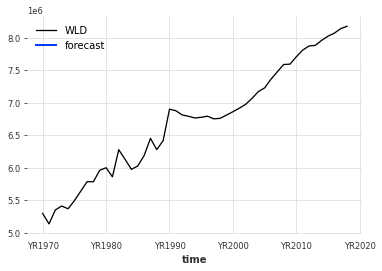

In [16]:
import matplotlib.pyplot as plt

meth_series.plot()
prediction.plot(label='forecast', low_quantile=0.9, high_quantile=0.9)
plt.legend()

In [ ]:
meth_frame = meth_series.to_frame().reset_index()
meth_frame
meth_frame.reset_index(drop=True, inplace=True)
meth_frame
#meth_frame.drop(['index'])
meth_frame.insert(0, 'Index', range(1960, 1960 + len(meth_frame)))
meth_frame
meth_frame.set_index('Index', inplace=True)
meth_frame
x = meth_frame.reset_index()
x.reset_index()
meth_re = x.drop(['index'], axis =1)
meth_re.rename(columns={'Index': 'index'})
meth_res = meth_re.set_index(['index'])
meth_res

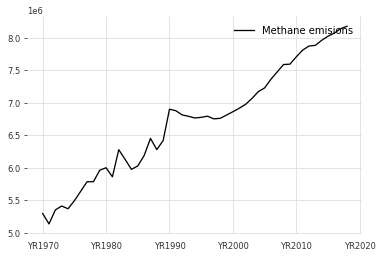

In [19]:
meth_series.plot(label="urban population")
plt.legend(loc= "upper right")

In [20]:
# train test
train, val = meth_series[:-10], meth_series[-30:]
train

YR1960             NaN
YR1961             NaN
YR1962             NaN
YR1963             NaN
YR1964             NaN
YR1965             NaN
YR1966             NaN
YR1967             NaN
YR1968             NaN
YR1969             NaN
YR1970    5.294459e+06
YR1971    5.133799e+06
YR1972    5.348885e+06
YR1973    5.409389e+06
YR1974    5.366479e+06
YR1975    5.490220e+06
YR1976    5.636323e+06
YR1977    5.783159e+06
YR1978    5.782389e+06
YR1979    5.959260e+06
YR1980    5.997922e+06
YR1981    5.858004e+06
YR1982    6.275399e+06
YR1983    6.126519e+06
YR1984    5.973201e+06
YR1985    6.025375e+06
YR1986    6.184971e+06
YR1987    6.449419e+06
YR1988    6.276210e+06
YR1989    6.416173e+06
YR1990    6.898360e+06
YR1991    6.875120e+06
YR1992    6.810430e+06
YR1993    6.789110e+06
YR1994    6.763240e+06
YR1995    6.773440e+06
YR1996    6.790740e+06
YR1997    6.749630e+06
YR1998    6.758180e+06
YR1999    6.808320e+06
YR2000    6.859450e+06
YR2001    6.913060e+06
YR2002    6.973040e+06
YR2003    7

In [ ]:

from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val), num_samples=1000)

/storage/anaconda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/storage/anaconda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


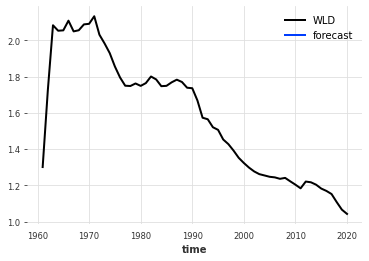

In [179]:
import matplotlib.pyplot as plt

series.plot()
prediction.plot(label='forecast', low_quantile=0.9, high_quantile=0.9)
plt.legend()